<a href="https://colab.research.google.com/github/manasapjoshi/Data_Analysis_Projects/blob/main/Support_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVMs are a type of machine learning model that use classification algorithms to solve two-group classification problems. SVMs are based on statistical learning theory and use a vector space to find a decision boundary between two classes that are furthest from any point in the training data.
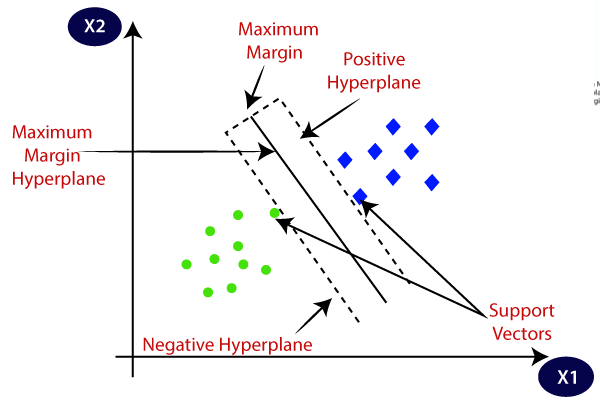

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Load the dataset
df=pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [ ]:
#drop columns
df1=df.drop(['ID','ZIP Code'],axis=1) #axis used for column
df1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<Axes: >

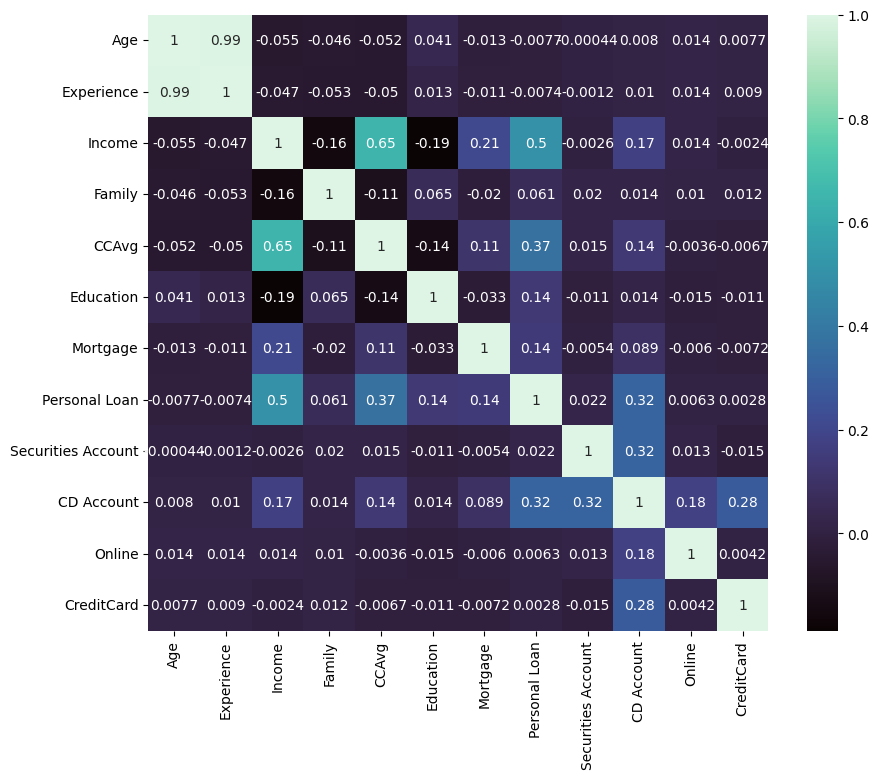

In [ ]:
#heatmap data correlation
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,cmap='mako')

In [ ]:
df['CreditCard'].unique()

array([0, 1])

In [ ]:
Yes_CreditCard=df1[df1['CreditCard']==1]
No_CreditCard=df1[df1['CreditCard']==0]
print(Yes_CreditCard.shape)
print(No_CreditCard.shape)
#it will show result rows and columns
#print(Yes_CreditCard)

(1470, 12)
(3530, 12)


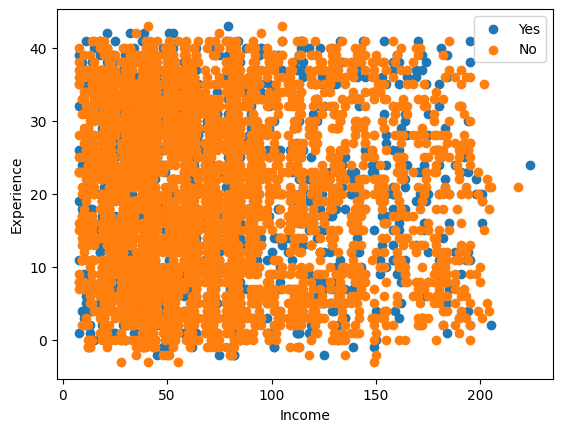

In [ ]:
#income and experience relationship using scatter plot
plt.scatter(Yes_CreditCard['Income'],Yes_CreditCard['Experience'])
plt.scatter(No_CreditCard['Income'],No_CreditCard['Experience'])
plt.xlabel('Income')
plt.ylabel('Experience')
plt.legend(['Yes','No'])

In [ ]:
#data labeling using sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

le.fit(["paris","paris","tokyo","amsterdam"])
filtData=list(le.classes_)
print('Filtered Data',filtData)
tran=le.transform(filtData)
print('Encoding the Data',tran)

retran=le.inverse_transform([0]) #(tran)
print('Retransform the Data',retran)

Filtered Data ['amsterdam', 'paris', 'tokyo']
Encoding the Data [0 1 2]
Retransform the Data ['amsterdam']


In [ ]:
#scaling of data using standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit(df1.drop('CreditCard',axis=1)).transform(df1.drop('CreditCard',axis=1))
df_scaled=pd.DataFrame(scaled,columns=df1.columns[:-1])
df_scaled.head()
#

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online
0,-1.774417,-1.666078,-0.538229,1.397414,-0.193371,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
1,-0.029524,-0.096330,-0.864109,0.525991,-0.250595,-1.049078,-0.555524,-0.325875,2.928915,-0.25354,-1.216618
2,-0.552992,-0.445163,-1.363793,-1.216855,-0.536720,-1.049078,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
3,-0.901970,-0.968413,0.569765,-1.216855,0.436103,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618
4,-0.901970,-1.055621,-0.625130,1.397414,-0.536720,0.141703,-0.555524,-0.325875,-0.341423,-0.25354,-1.216618


In [ ]:
x=df_scaled
y=df1['CreditCard']


In [ ]:
#split, train, and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [ ]:
#Apply the SVM model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.7586666666666667


In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
cm_matrix=pd.DataFrame(confusion_matrix(y_test,y_pred),index=['Yes','No'],columns=['Yes','No'])
cm_matrix

,Yes,No
Yes,1076,11
No,351,62


<Axes: >

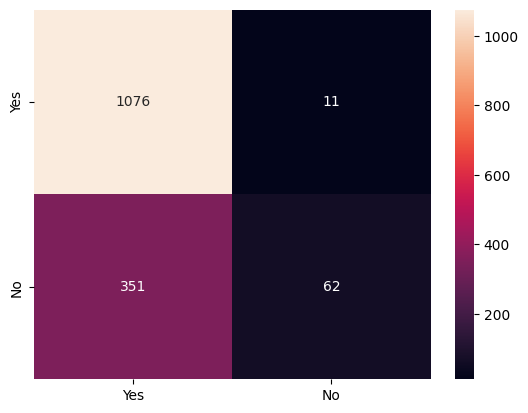

In [ ]:
#Heatmap chart
import seaborn as sns
sns.heatmap(cm_matrix,annot=True,fmt='d')